# Data Preprocessing Assignment

Assignment instructions: https://github.com/vesavvo/dkko/blob/main/assignments/Assignment_Data_preprocessing.md

## Fetch dataset

The dataset can be fetched using the `fetch_ucirepo` function. Here, we will fetch the Chronic Kidney Disease dataset with ID 336. The dataset is loaded into a pandas DataFrame for further analysis and preprocessing.


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
df = chronic_kidney_disease.data.original
#strip whitespace from string columns
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

## Wanted columns from the dataset

The dataset has 400 entries and 25 columns. The rows represent individual patients and the columns represent various medical attributes related to chronic kidney disease. The variables include both floating-point numbers and object types, indicating a mix of numerical and categorical data.

The preprocessed dataset will include the following columns:
- age
- blood pressure
- specific gravity
- albumin
- sugar
- blood glucose random
- blood urea
- sodium
- potassium
- hemoglobin
- packed cell volume
- white blood cell count
- red blood cell count
- class

Abbreviations have been checked from the dataset description: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

In [3]:
# Select wanted columns based on assignment instructions. New dataframe contains only these columns.
# Create a copy of the dataframe to avoid SettingWithCopyWarning when modifying the dataframe later.
wanted_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sod', 'hemo', 'pcv', 'wbcc', 'rbcc', 'class']
df = df[wanted_columns].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     356 non-null    float64
 6   bu      381 non-null    float64
 7   sod     313 non-null    float64
 8   hemo    348 non-null    float64
 9   pcv     329 non-null    float64
 10  wbcc    294 non-null    float64
 11  rbcc    269 non-null    float64
 12  class   400 non-null    object 
dtypes: float64(12), object(1)
memory usage: 40.8+ KB


## Heamoglobin unit conversion

In the original dataset the heamoglobin value is given in the unit g/dL. In the preprocessed dataset, the heamoglobin value is converted to the unit g/l. To convert g/dL to g/l, the value is multiplied by 10. For example, a heamoglobin value of 15.4 g/dL is converted to 154 g/l in the preprocessed dataset.

In [4]:
# convert hemo from g/dL to g/l.
df['hemo'] = df['hemo'] * 10
df.head()

,age,bp,sg,al,su,bgr,bu,sod,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,154.0,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,113.0,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,96.0,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,112.0,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,116.0,35.0,7300.0,4.6,ckd


## Column value conversion

Next, the class column should be converted to a or c (affected or control). In the original dataset, the class column contains the values 'ckd' and 'notckd'. At this point I realized that there are some trailing spaces in the string values of the dataframe. I insterted a code line in the first code cell to strip whitespace from string columns (so, not just the class column). After this, the class column conversion can be done without issues.

In [5]:
# class column conversion from ckd/notckd to a/c
df['class'] = df['class'].replace({'ckd': 'a', 'notckd': 'c'})
#To check unique values in class column
df['class'].unique()


array(['a', 'c'], dtype=object)

## Removal of rows with many missing values

All rows with three or more missing values are removed from the dataset. 

In [6]:
# remove rows with three or more missing values
df = df[df.isnull().sum(axis=1) < 3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     274 non-null    float64
 1   bp      273 non-null    float64
 2   sg      276 non-null    float64
 3   al      277 non-null    float64
 4   su      277 non-null    float64
 5   bgr     264 non-null    float64
 6   bu      272 non-null    float64
 7   sod     244 non-null    float64
 8   hemo    274 non-null    float64
 9   pcv     275 non-null    float64
 10  wbcc    261 non-null    float64
 11  rbcc    248 non-null    float64
 12  class   277 non-null    object 
dtypes: float64(12), object(1)
memory usage: 30.3+ KB


The dataset after removal includes 277 entries in 13 columns (400 and 25 before removal).

## Split dataframe into affected and control dataframes

Next, the dataframe is split into two: one for affected (class a) and one for control (class c).

In [7]:
# Split dataframe into affected and control dataframes
df_affected = df[df['class'] == 'a'].copy()
df_control = df[df['class'] == 'c'].copy()
print("Affected dataframe info:")
df_affected.info()
print()
print()
print("Control dataframe info:")
df_control.info()


Affected dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 249
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     135 non-null    float64
 1   bp      136 non-null    float64
 2   sg      137 non-null    float64
 3   al      138 non-null    float64
 4   su      138 non-null    float64
 5   bgr     129 non-null    float64
 6   bu      137 non-null    float64
 7   sod     108 non-null    float64
 8   hemo    137 non-null    float64
 9   pcv     137 non-null    float64
 10  wbcc    125 non-null    float64
 11  rbcc    112 non-null    float64
 12  class   138 non-null    object 
dtypes: float64(12), object(1)
memory usage: 15.1+ KB


Control dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 250 to 399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     139 non-null    float64
 1   bp      137 non-null  

The affected dataframe includes 138 entries and the control dataframe includes 139 entries.

In [8]:
print("Affected dataframe:")
display(df_affected.head())
print("Control dataframe:")
display(df_control.head())

Affected dataframe:


,age,bp,sg,al,su,bgr,bu,sod,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,154.0,44.0,7800.0,5.2,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,96.0,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,122.0,39.0,7800.0,4.4,a


Control dataframe:


,age,bp,sg,al,su,bgr,bu,sod,hemo,pcv,wbcc,rbcc,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,130.0,49.0,8300.0,5.2,c


## Basic statistics and histograms

For each data frame, calculate the basic statistics for each column, and provide clear, readable histograms for each numerical column

Basic statistics for affected dataframe:


,age,bp,sg,al,su,bgr,bu,sod,hemo,pcv,wbcc,rbcc,class
count,135.000000,136.000000,137.000000,138.000000,138.000000,129.000000,137.000000,108.000000,137.000000,137.000000,125.000000,112.000000,138
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138
mean,55.992593,80.441176,1.013686,1.818841,0.833333,182.713178,76.645985,133.731481,107.313869,32.919708,9111.200000,3.997321,NaN
std,15.286564,15.485604,0.004548,1.435908,1.391231,96.736449,59.355861,7.666661,21.696012,7.192785,3731.453405,0.843572,NaN
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,31.000000,9.000000,2200.000000,2.100000,NaN
25%,48.000000,70.000000,1.010000,0.000000,0.000000,107.000000,35.000000,131.750000,96.000000,29.000000,6800.000000,3.400000,NaN
50%,60.000000,80.000000,1.015000,2.000000,0.000000,156.000000,55.000000,136.000000,109.000000,33.000000,9000.000000,3.900000,NaN
75%,65.000000,90.000000,1.015000,3.000000,1.750000,242.000000,98.000000,139.000000,122.000000,37.000000,10700.000000,4.400000,NaN


Basic statistics for control dataframe:


,age,bp,sg,al,su,bgr,bu,sod,hemo,pcv,wbcc,rbcc,class
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,137.000000,138.000000,136.000000,136.000000,139
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,151.883212,46.246377,7708.088235,5.380882,NaN
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,12.845270,4.107695,1815.164727,0.592986,NaN
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,130.000000,40.000000,4300.000000,4.500000,NaN
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,141.000000,43.000000,6300.000000,4.900000,NaN
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,150.000000,46.000000,7450.000000,5.300000,NaN
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,162.000000,50.000000,9225.000000,5.900000,NaN


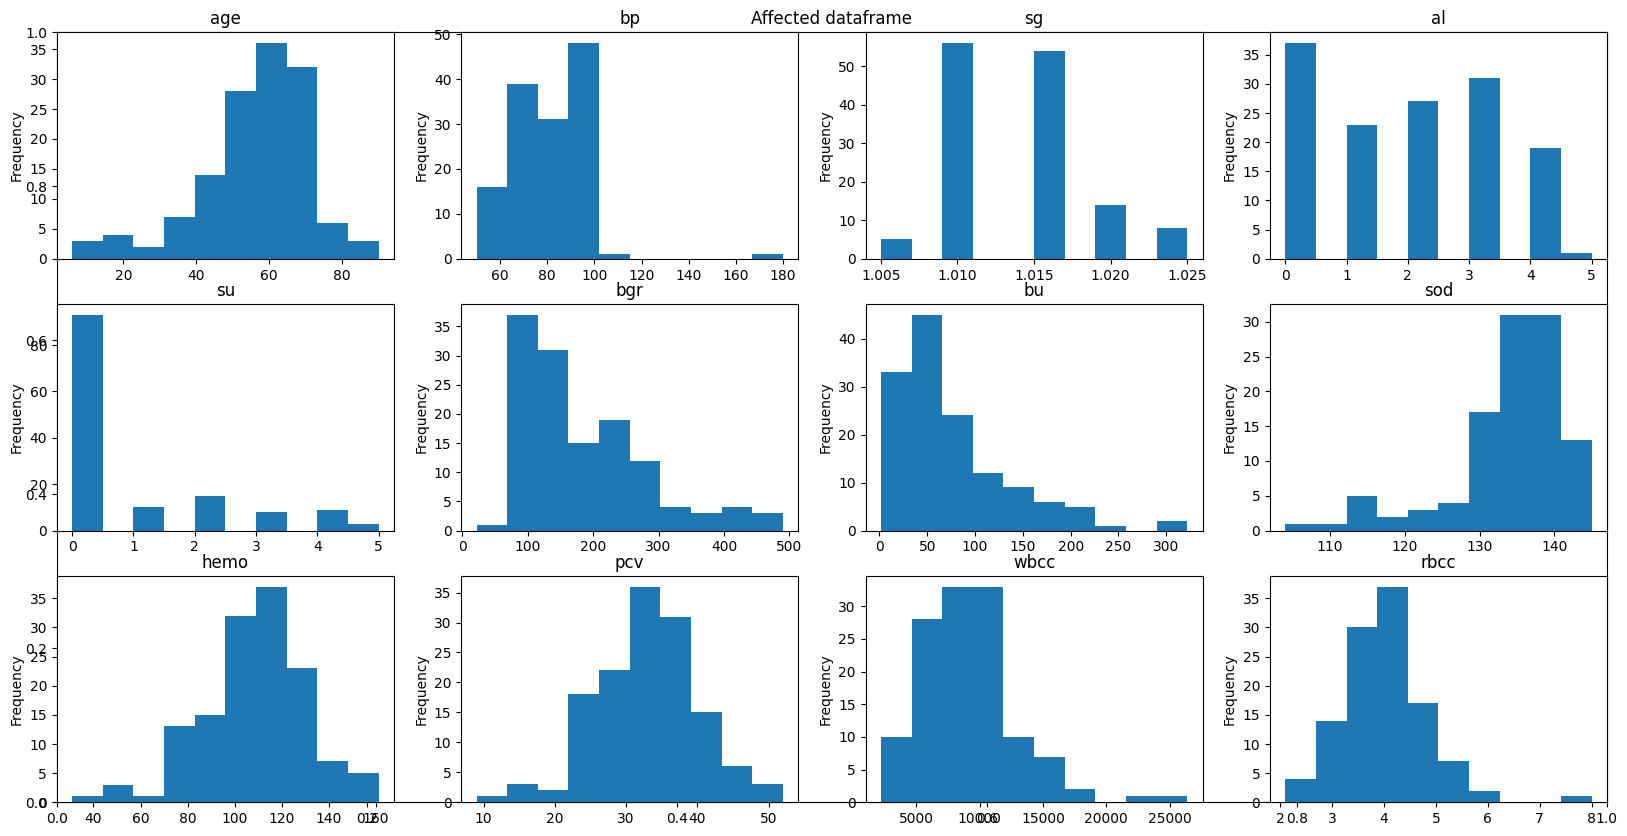

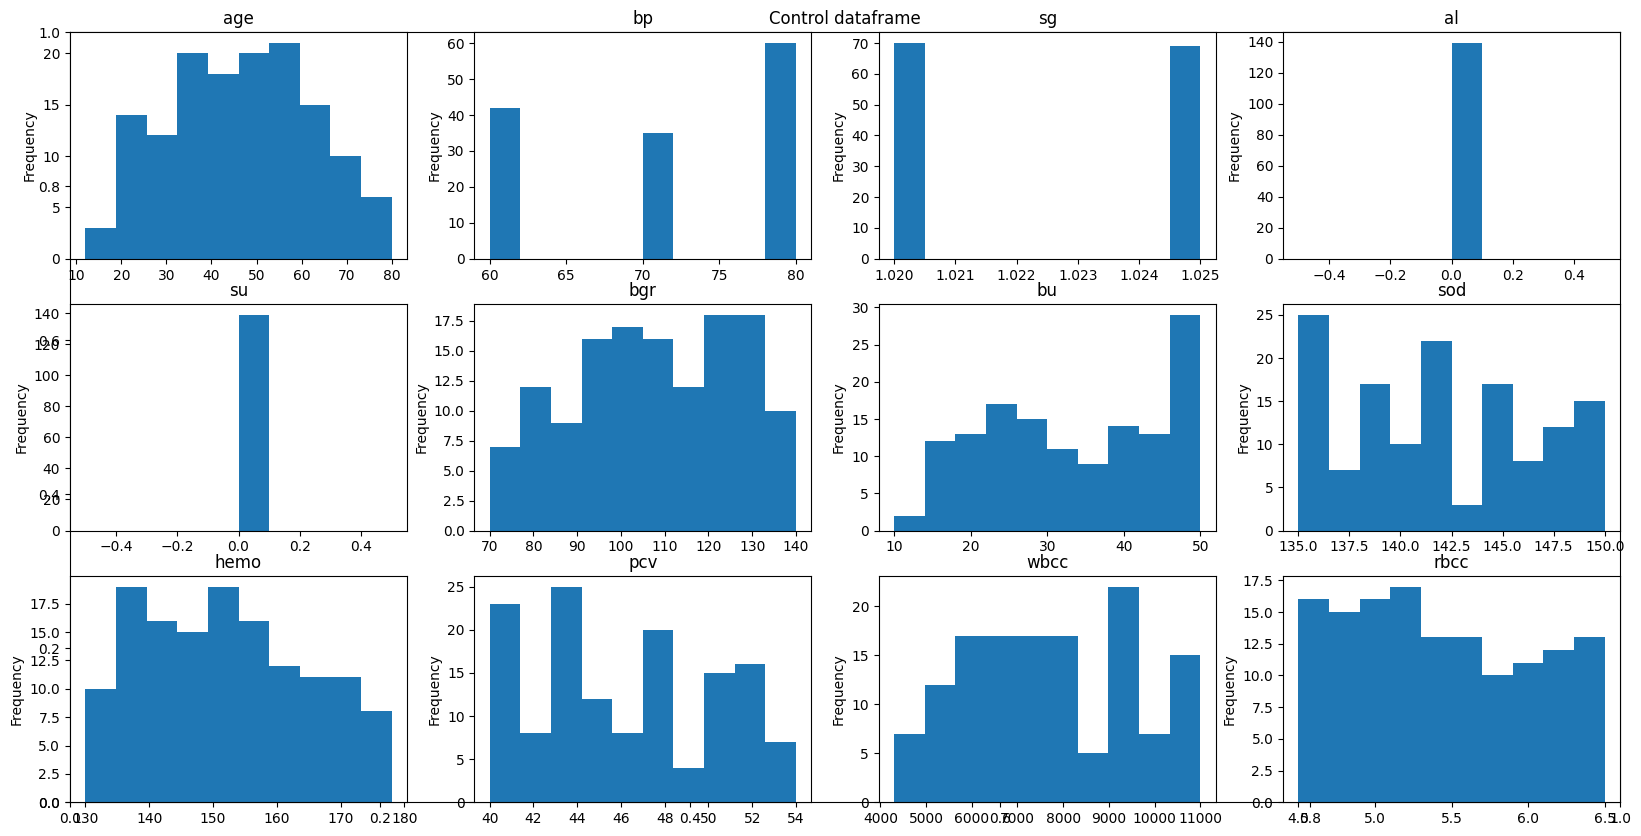

In [9]:
import matplotlib.pyplot as plt

# function to plot histograms for numerical columns in a dataframe
def plot_data(df, dfname):
    plt.figure(figsize=(20, 10))
    plt.title(dfname)
    for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
        plt.subplot(3, 4, i + 1)
        df[col].plot(kind='hist', title=col)


# function to calculate and display basic statistics for a dataframe
def calculate_basic_statistics(df, df_name):
    print(f"Basic statistics for {df_name} dataframe:")
    display(df.describe(include='all'))

# Calculate basic statistics and plot histograms for affected dataframe
calculate_basic_statistics(df_affected, "affected")
plot_data(df_affected, "Affected dataframe")  

# Calculate basic statistics and plot histograms for control dataframe
calculate_basic_statistics(df_control, "control")
plot_data(df_control, "Control dataframe")

 It is difficult to determine if there are any clear outliers as values for affected patients can be very off being either high or low. For example, the white blood cell count for affected patients ranges from 2200 to 26000 while for control patients it ranges from 4300 to 11000. In plain words, sick patients can either have lower or higher than average white blood cell count. 

Values that clearly indicate kidney disease are sugar and albumin in urin (su and al columns). For the control group the values are only 0 (normal) while for the affected group the values range from 0 to 5 (normal to very high). Same goes for blood pressure (bp column) where the control group has values ranging from 70 to 120 while the affected group has mostly values below 100 and a few above 160. These values for the affected group indicate either low or high blood pressure which are both signs of kidney disease.

Summarizing, the values for affected patients are generally worse than those for control patient making it difficult to determine clear outliers. In the presence of clear outliers the dataset could be further preprocessed by either removing the outliers or transforming them to more reasonable values. One possible transformation would be to insert a mean value for the outlier values. For removal or transformation of outliers in such a dataset which contains medical data, it would be important to consult a medical expert to avoid removing or transforming values that are actually valid even though they appear as outliers.

## Correlation matix


In [10]:
# Correlation matrix, excluding the first column that is an index and the class column
print("Correlation matrix for affected dataframe:")
corr_affected = df_affected.drop(columns ='class').corr()
display(corr_affected)
print("Correlation matrix for control dataframe:")
corr_control = df_control.drop(columns = 'class').corr()
display(corr_control)


Correlation matrix for affected dataframe:


,age,bp,sg,al,su,bgr,bu,sod,hemo,pcv,wbcc,rbcc
age,1.000000,0.070704,-0.074391,0.018251,0.147339,0.190999,0.080871,-0.033951,-0.057725,-0.111004,0.100588,-0.062716
bp,0.070704,1.000000,0.012187,-0.016585,0.157162,0.049172,0.067211,0.148208,-0.082677,-0.107625,-0.025852,0.107051
sg,-0.074391,0.012187,1.000000,-0.034099,-0.052130,-0.112498,-0.064464,0.143235,0.129161,0.132291,-0.055153,0.107858
al,0.018251,-0.016585,-0.034099,1.000000,0.152854,0.111964,0.420065,-0.179331,-0.375605,-0.323842,0.103449,-0.239018
su,0.147339,0.157162,-0.052130,0.152854,1.000000,0.715616,-0.059417,0.052022,0.165482,0.127726,0.105781,0.102728
bgr,0.190999,0.049172,-0.112498,0.111964,0.715616,1.000000,-0.037134,-0.053968,0.127706,0.105738,0.043816,0.162316
bu,0.080871,0.067211,-0.064464,0.420065,-0.059417,-0.037134,1.000000,-0.320019,-0.616724,-0.587482,-0.059186,-0.495739
sod,-0.033951,0.148208,0.143235,-0.179331,0.052022,-0.053968,-0.320019,1.000000,0.295139,0.317933,0.019716,0.266934
hemo,-0.057725,-0.082677,0.129161,-0.375605,0.165482,0.127706,-0.616724,0.295139,1.000000,0.945815,0.020089,0.784270
pcv,-0.111004,-0.107625,0.132291,-0.323842,0.127726,0.105738,-0.587482,0.317933,0.945815,1.000000,-0.046698,0.796558


Correlation matrix for control dataframe:


,age,bp,sg,al,su,bgr,bu,sod,hemo,pcv,wbcc,rbcc
age,1.000000,-0.071093,-0.092814,NaN,NaN,0.101408,0.078620,0.110581,0.056334,-0.009969,0.128762,-0.045118
bp,-0.071093,1.000000,0.084470,NaN,NaN,0.004094,-0.084057,-0.107489,0.157748,-0.007854,-0.098981,-0.030603
sg,-0.092814,0.084470,1.000000,NaN,NaN,-0.038416,-0.050116,-0.033880,0.026303,-0.007082,-0.028054,0.067207
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
su,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bgr,0.101408,0.004094,-0.038416,NaN,NaN,1.000000,-0.067850,-0.007900,-0.147729,-0.257604,-0.069143,-0.196675
bu,0.078620,-0.084057,-0.050116,NaN,NaN,-0.067850,1.000000,0.005475,0.085647,0.116931,0.041256,-0.010890
sod,0.110581,-0.107489,-0.033880,NaN,NaN,-0.007900,0.005475,1.000000,-0.011060,-0.001524,0.338373,-0.092615
hemo,0.056334,0.157748,0.026303,NaN,NaN,-0.147729,0.085647,-0.011060,1.000000,0.057235,-0.191126,0.075912
pcv,-0.009969,-0.007854,-0.007082,NaN,NaN,-0.257604,0.116931,-0.001524,0.057235,1.000000,-0.085214,0.042696


Heatmap for affected dataframe correlation matrix:


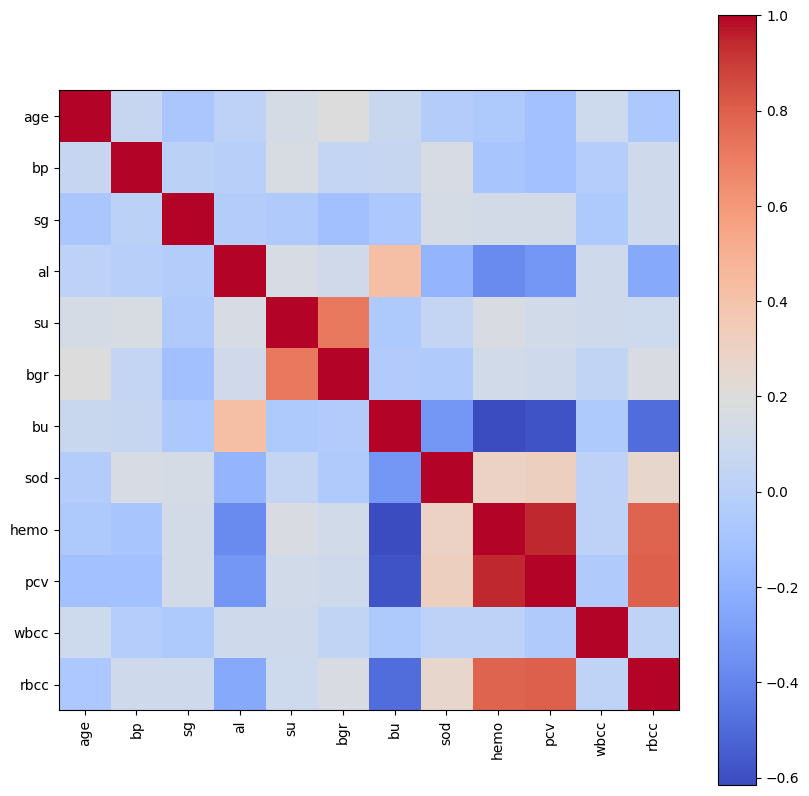

Heatmap for control dataframe correlation matrix:


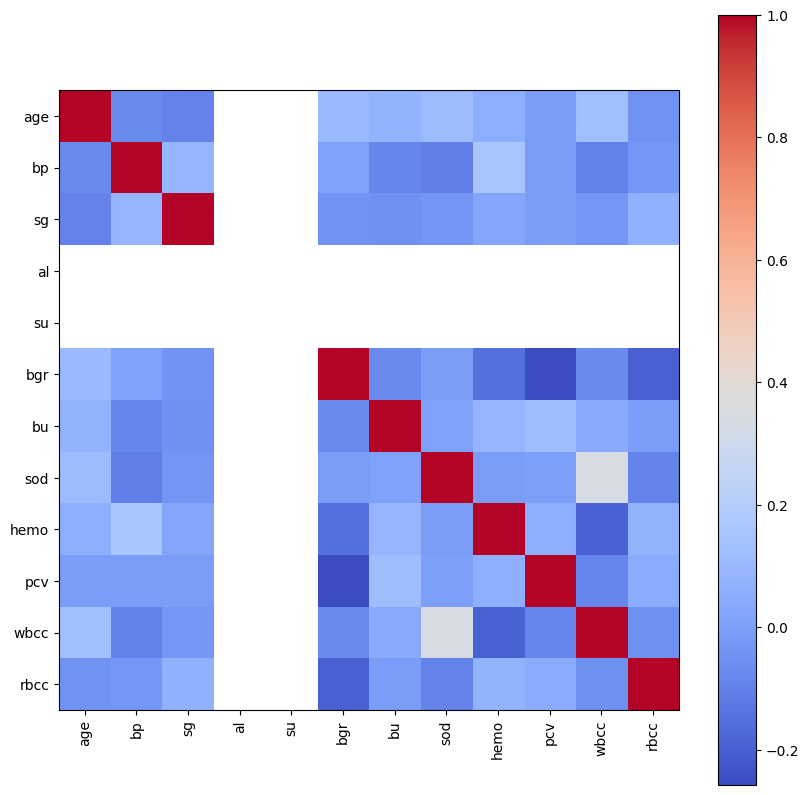

In [11]:
# create heatmaps for correlation matrices

print("Heatmap for affected dataframe correlation matrix:")
plt.figure(figsize=(10, 10))
plt.imshow(corr_affected, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_affected)), corr_affected.columns, rotation=90)
plt.yticks(range(len(corr_affected)), corr_affected.columns)
plt.show()

print("Heatmap for control dataframe correlation matrix:")
plt.figure(figsize=(10, 10))
plt.imshow(corr_control, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_control)), corr_control.columns, rotation=90)
plt.yticks(range(len(corr_control)), corr_control.columns)
plt.show()

There are a few correlations in the affected dataframe that stand out. There is positive correlations between blood random sugar and sugar (in urine) as well as blood urea and albumin (in urine). In kidney disease this is expected. Also anemia is expected so it is logical that there is a positive correlation between hemoglobin and packed cell volume as well as red blood cell count. 

The control dataframe has less correlations that stand out. This shows that the affected dataframe has more relationships between the variables which is logical as kidney disease affects many bodily functions and the control group is healthy and regulated.